<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.

   - Remember that for multi-class classification you need a softamx activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Trian your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaning the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for _at least_ two of the four "configurations":

1. Using a `tensorflow` network (we did _not_ cover this in class!)
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.label.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [6]:
# Define X and y
Xraw = df.drop(columns='label')
y = df['label']

In [7]:
# Normalize X
X = Xraw/255.0

In [8]:
def plot_number(X,y,index):
    image
    plt.imshow

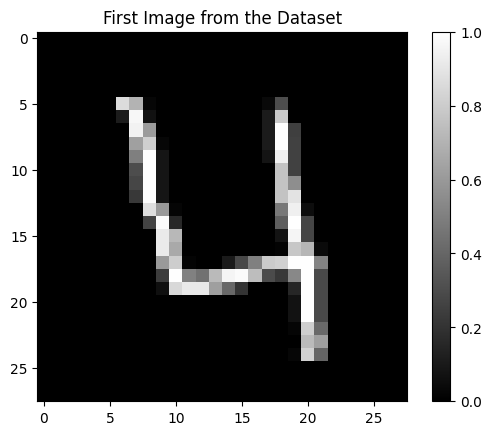

In [9]:
# Testing to plot X
image = X.iloc[3].values.reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title('First Image from the Dataset')
plt.colorbar()
plt.show()

In [10]:
# OHE y
y = to_categorical(y)

In [11]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Neural Network Base Model

In [12]:
# Create the neural network model
model = Sequential()

n_input = X_train.shape[1]

model.add(Dense(128, input_dim=n_input, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

C:\Users\ng_we\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test,y_test),
                    batch_size=256,
                    epochs=20
                   )

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7065 - loss: 1.0092 - val_accuracy: 0.9275 - val_loss: 0.2611
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.2390 - val_accuracy: 0.9424 - val_loss: 0.1918
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9516 - loss: 0.1719 - val_accuracy: 0.9504 - val_loss: 0.1689
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9613 - loss: 0.1324 - val_accuracy: 0.9590 - val_loss: 0.1422
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9683 - loss: 0.1124 - val_accuracy: 0.9612 - val_loss: 0.1345
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9739 - loss: 0.0883 - val_accuracy: 0.9636 - val_loss: 0.1220
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.0772 - val_accuracy: 0.9652 - val_loss: 0.1209
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.0693 - val_accuracy: 0.

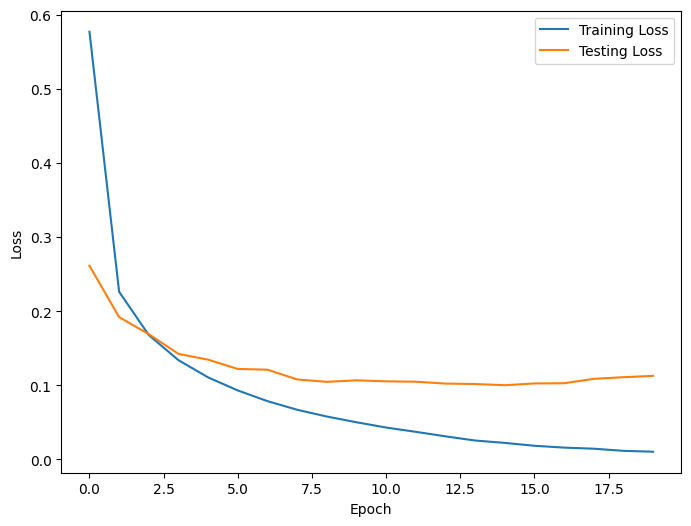

In [15]:
# Plot our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over the 10 epochs.
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

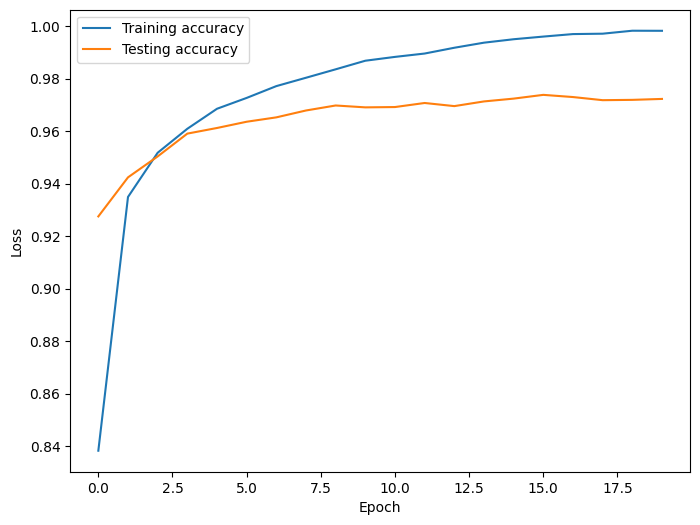

In [16]:
# Set figure size.
plt.figure(figsize=(8, 6))

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Testing accuracy')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

##### Gap between training and test is big, sign of overfitting. We will try with some regularization

### Neural Network With Droupout

In [17]:
# Create the neural network model
model = Sequential()

n_input = X_train.shape[1]

model.add(Dense(128, input_dim=n_input, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()

C:\Users\ng_we\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test,y_test),
                    batch_size=256,
                    epochs=20
                   )

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5742 - loss: 1.2982 - val_accuracy: 0.9145 - val_loss: 0.3032
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8758 - loss: 0.4245 - val_accuracy: 0.9400 - val_loss: 0.2119
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9106 - loss: 0.3099 - val_accuracy: 0.9480 - val_loss: 0.1769
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9273 - loss: 0.2507 - val_accuracy: 0.9536 - val_loss: 0.1569
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9364 - loss: 0.2189 - val_accuracy: 0.9590 - val_loss: 0.1429
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9413 - loss: 0.2006 - val_accuracy: 0.9623 - val_loss: 0.1303
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9473 - loss: 0.1804 - val_accuracy: 0.9645 - val_loss: 0.1224
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9533 - loss: 0.1644 - val_accuracy: 0.

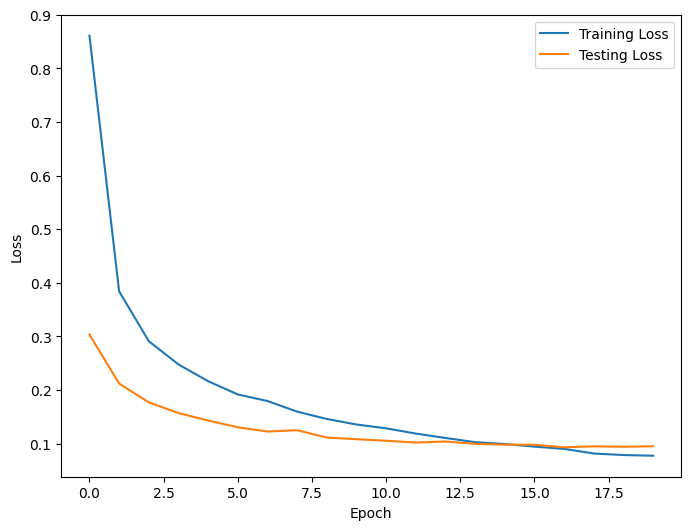

In [20]:
# Plot our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over the 10 epochs.
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

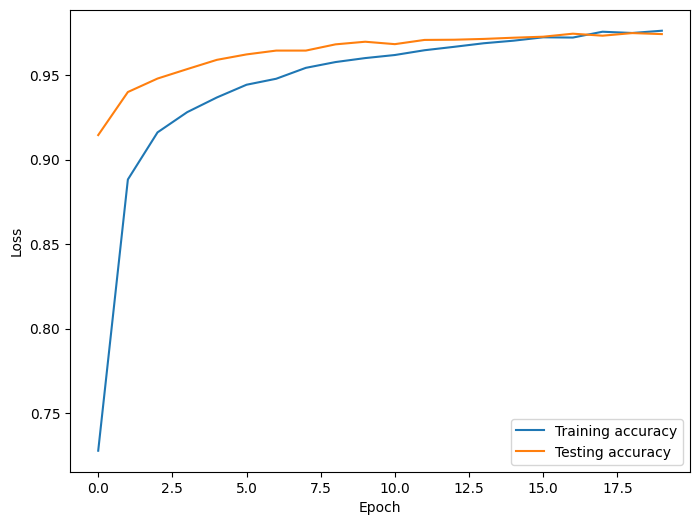

In [21]:
# Set figure size.
plt.figure(figsize=(8, 6))

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Testing accuracy')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

### Neural Network With Droupout and EarlyStopping

In [22]:
# Create the neural network model
model = Sequential()

n_input = X_train.shape[1]

model.add(Dense(128, input_dim=n_input, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()

C:\Users\ng_we\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
# Instantiating EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0.01,
                           patience=3,
                           mode='auto'
                          )

history = model.fit(X_train, y_train, 
                    validation_data=(X_test,y_test),
                    batch_size=256,
                    epochs=20
                   )

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5524 - loss: 1.3586 - val_accuracy: 0.9126 - val_loss: 0.3202
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.4453 - val_accuracy: 0.9323 - val_loss: 0.2337
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9053 - loss: 0.3250 - val_accuracy: 0.9455 - val_loss: 0.1890
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9203 - loss: 0.2830 - val_accuracy: 0.9525 - val_loss: 0.1659
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9297 - loss: 0.2389 - val_accuracy: 0.9587 - val_loss: 0.1458
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9404 - loss: 0.2055 - val_accuracy: 0.9621 - val_loss: 0.1337
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9454 - loss: 0.1885 - val_accuracy: 0.9626 - val_loss: 0.1267
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9500 - loss: 0.1713 - val_accuracy: 0.

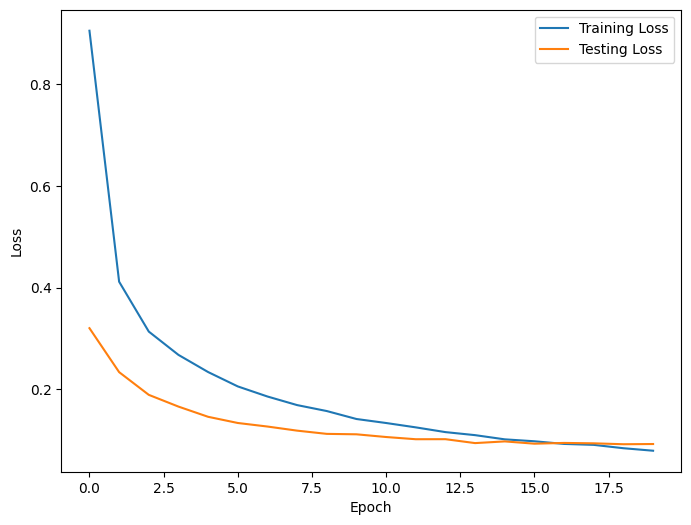

In [25]:
# Plot our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over the 10 epochs.
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

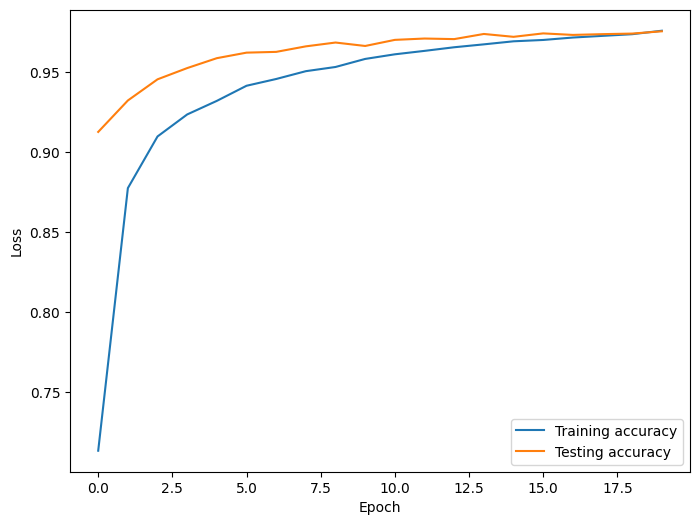

In [26]:
# Set figure size.
plt.figure(figsize=(8, 6))

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Testing accuracy')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

In [27]:
predictions = model.predict(X_test)
# Convert predictions to labels
predicted_labels = predictions.argmax(axis=1)
predicted_labels

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


array([2, 5, 0, ..., 8, 6, 5], dtype=int64)

### Convolutional Network

In [28]:
# Convert flattened image back to image format
X_image = np.reshape(X,(42000,28,28))
X_image

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [29]:
X_image_train, X_image_test, y_train, y_test = train_test_split(X_image, y, test_size=0.2, stratify=y, random_state=42)

In [30]:
# Initiating Model
model = Sequential()

# CNN Layers
model.add(Conv2D(filters=20,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 input_shape=(28,28,1)
                ))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=10,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 input_shape=(28,28,1)
                ))

model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

C:\Users\ng_we\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 20)     │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 10)     │         1,810 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 490)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        62,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,148 (258.39 KB)

 Trainable params: 66,148 (258.39 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [32]:
history = model.fit(X_image_train, y_train,
                    validation_data=(X_image_test, y_test),
                    batch_size=256,
                    epochs=20
                   )

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5717 - loss: 1.3984 - val_accuracy: 0.9423 - val_loss: 0.2040
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9245 - loss: 0.2486 - val_accuracy: 0.9621 - val_loss: 0.1260
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9532 - loss: 0.1614 - val_accuracy: 0.9721 - val_loss: 0.0927
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9625 - loss: 0.1251 - val_accuracy: 0.9785 - val_loss: 0.0721
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9680 - loss: 0.1021 - val_accuracy: 0.9806 - val_loss: 0.0661
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9737 - loss: 0.0878 - val_accuracy: 0.9825 - val_loss: 0.0601
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9757 - loss: 0.0772 - val_accuracy: 0.9837 - val_loss: 0.0557
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9764 - loss: 0.0761 - val_accuracy: 0.

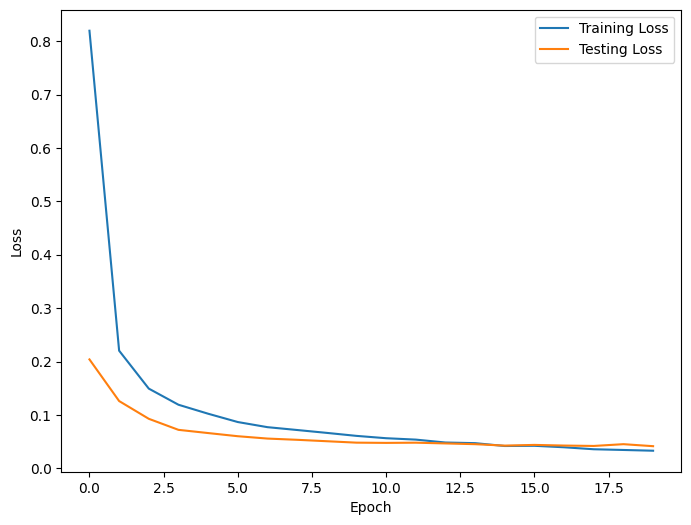

In [33]:
# Plot our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over the 10 epochs.
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

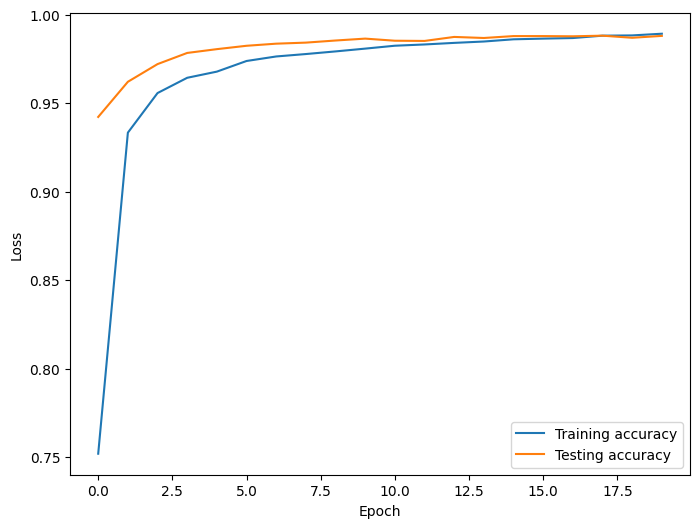

In [34]:
# Set figure size.
plt.figure(figsize=(8, 6))

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Testing accuracy')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

In [35]:
test_df_raw = pd.read_csv('data/test.csv')
test_df_raw.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Normalize X
test_df = test_df_raw/255.0
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
test_df.shape

(28000, 784)

In [38]:
test_df_image = np.reshape(test_df,(28000,28,28))

In [39]:
preds = model.predict(test_df_image)
preds

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[1.35000025e-10, 3.36147749e-13, 1.00000000e+00, ...,
        5.49194645e-09, 1.70538073e-08, 9.48584635e-13],
       [9.99999762e-01, 5.68047692e-12, 8.28851654e-09, ...,
        5.91421383e-08, 1.06319940e-08, 8.52312532e-09],
       [1.02530644e-10, 1.53006496e-09, 4.13247591e-07, ...,
        3.69005505e-07, 3.93631235e-05, 9.99945521e-01],
       ...,
       [9.47736629e-20, 1.04566204e-13, 8.31158753e-12, ...,
        3.69661524e-10, 1.38145259e-11, 3.22541382e-10],
       [1.27107797e-12, 3.06856013e-10, 1.45047238e-10, ...,
        1.36323033e-05, 8.63338840e-08, 9.99820173e-01],
       [1.11824621e-08, 4.42355831e-12, 9.99991059e-01, ...,
        2.89328650e-09, 7.95790493e-06, 8.74897932e-10]], dtype=float32)

In [40]:
kaggle_preds = np.argmax(preds, axis=1)
kaggle_preds

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [41]:
len(kaggle_preds)

28000

In [42]:
predictions_df = pd.DataFrame({
    'ImageId': list(range(1,28001)),
    'Label': kaggle_preds
})
predictions_df.to_csv('model_predictions.csv', index=False)

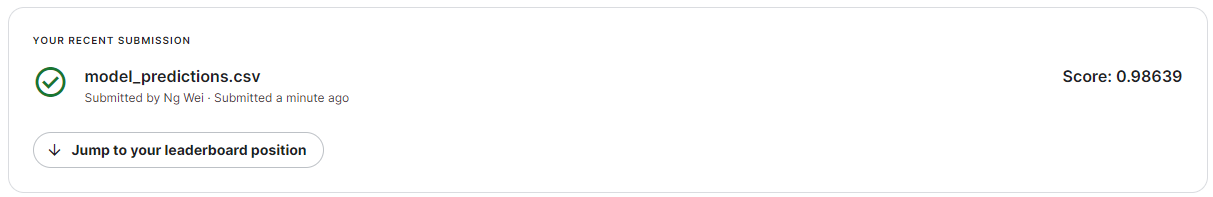